# Figures
I will use this notebook to create figures for the paper.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/sandesh/repos/quantum-ml/Nanowire Model/")
sys.path.append("/Users/sandesh/repos/quantum-ml/Data Generation/")

import matplotlib as mpl
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams.update({'font.size': 12})

import matplotlib.cm as cm
mpl.rcParams['font.family'] = "serif"

## Single dot figures
I need the following figures

* a plunger trace + associated charge
* dataview of the training set 

In [31]:
import random_single_dot
data_path = "/Users/sandesh/repos/quantum-ml/Data Generation/Figure Data/"

result = random_single_dot.calc_plunger_trace(1024,data_path)

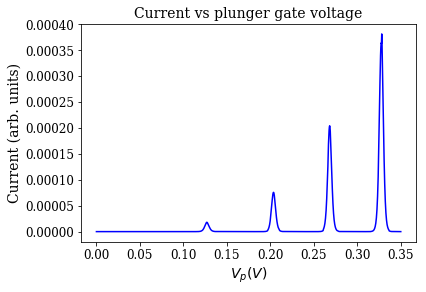

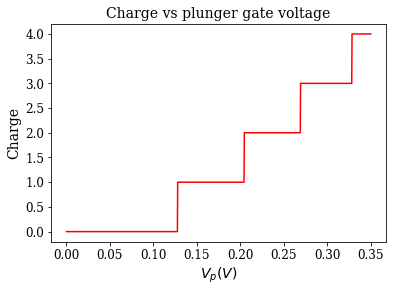

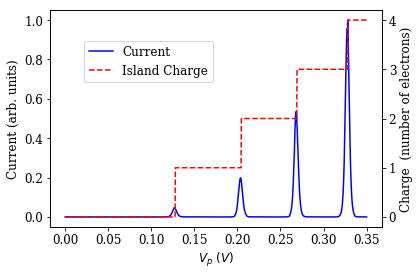

In [56]:
V_P_vec = result['V_P_vec']
current_vec = [x['current'] for x in result['output']]
charge_vec = [np.sum(x['charge']) for x in result['output']]
plt.figure(1)
plt.plot(-V_P_vec,current_vec,color='b')
plt.ylabel(r"Current (arb. units)",fontsize=14)
plt.xlabel(r"$V_p (V)$",fontsize=14)

plt.title("Current vs plunger gate voltage",fontsize=14)


plt.figure(2)
plt.plot(-V_P_vec,charge_vec,color='r')
plt.ylabel(r"Charge",fontsize=14)
plt.xlabel(r"$V_p (V)$",fontsize=14)
plt.title("Charge vs plunger gate voltage",fontsize=14)

plt.figure(3)
fig,ax1 = plt.subplots()
p1 = ax1.plot(-V_P_vec,current_vec/np.max(current_vec),'b-',label="Current")
ax1.set_ylabel(r"Current (arb. units)")
ax1.set_xlabel(r"$V_p\ (V)$")

ax2 = ax1.twinx()
p2 = ax2.plot(-V_P_vec,charge_vec, 'r--',label="Island Charge")
ax2.set_ylabel(r"Charge  (number of electrons)")
ax2.set_yticks(range(5))
fig.tight_layout()
labels = [x.get_label() for x in p1 + p2]
fig.legend(p1+p2,labels,loc=(0.2,0.7))
plt.savefig("/Users/sandesh/Desktop/sd_combined.png",dpi=300)

## Double Dot

I need two figures here:
* a deeper map focusing on the honeycombs
* a larger map displaying all 4 states


In [60]:
import random_double_dot
import imp
imp.reload(random_double_dot)
data_path = "/Users/sandesh/repos/quantum-ml/Data Generation/Figure Data/"

res = random_double_dot.calc_plunger_map(256,data_path)

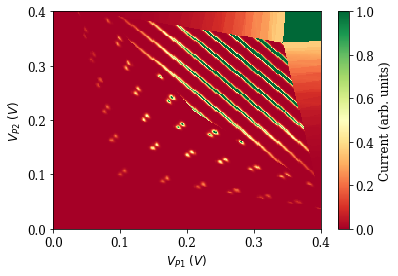

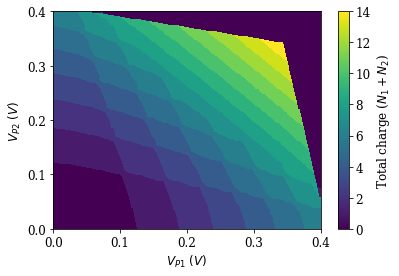

In [61]:
V_P1= np.array(res['V_P1_vec'])
V_P2= np.array(res['V_P2_vec'])
N_v = V_P1.shape[0]
XX,YY = np.meshgrid(V_P1,V_P2)


current_vec = np.array([x['current'] for x in res['output']]).reshape(N_v,N_v)
charge_vec = np.array([np.sum(x['charge']) for x in res['output']]).reshape(N_v,N_v)
state_vec = np.array([x['state'] for x in res['output']]).reshape(N_v,N_v)
sensor_vec = np.array([x['sensor'] for x in res['output']]).reshape(N_v,N_v,-1)

plt.figure(1)
plt.pcolor(-XX,-YY,1e4*current_vec,vmax=1.0,cmap=cm.RdYlGn)
plt.xlabel(r"$V_{P1}\ (V)$")
plt.ylabel(r"$V_{P2}\ (V)$")
plt.xticks(np.linspace(0,0.4,5))
plt.yticks(np.linspace(0,0.4,5))
cbar = plt.colorbar()
cbar.set_label("Current (arb. units)")
plt.savefig("/Users/sandesh/Desktop/dd_current_types.png",dpi=300)

plt.figure(2)
plt.pcolor(-XX,-YY,charge_vec)
plt.xlabel(r"$V_{P1}\ (V)$")
plt.ylabel(r"$V_{P2}\ (V)$")
plt.xticks(np.linspace(0,0.4,5))
plt.yticks(np.linspace(0,0.4,5))
cbar = plt.colorbar()
cbar.set_label("Total charge ($N_1 + N_2$)")
plt.savefig("/Users/sandesh/Desktop/dd_charge_types.png",dpi=300)

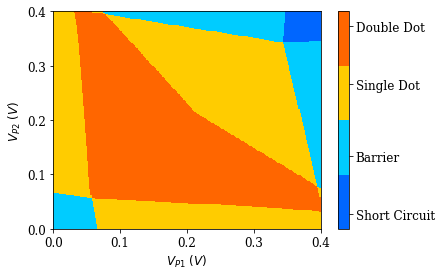

In [64]:


plt.figure(3)
import matplotlib as mpl
cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
plt.pcolor(-XX,-YY,state_vec,cmap=cmap)
plt.xlabel(r"$V_{P1}\ (V)$")
plt.ylabel(r"$V_{P2}\ (V)$")
plt.xticks(np.linspace(0,0.4,5))
plt.yticks(np.linspace(0,0.4,5))
cbar = plt.colorbar()
cbar.set_ticks([-0.8,0,1,1.8])
cbar.set_ticklabels(["Short Circuit","Barrier","Single Dot", "Double Dot"])
plt.savefig("/Users/sandesh/Desktop/dd_state_types.png",dpi=300)